In [11]:
from pydbgen import pydbgen
myDB=pydbgen.pydb()



In [23]:
df1 = myDB.gen_dataframe(1000,['name', 'email', 'city', 'state', 'country', 'phone','date'])
df2 = myDB.gen_dataframe(1000,['email', 'company', 'city'])

In [24]:
df1.merge(df2, on='city')

,name,email_x,city,state,country,phone-number,date,email_y,company
0,Heidi Duncan,Heidi_D@zoho.com,Lloyd,Washington,Anguilla,162-435-5848,1983-06-24,blackchristopher@best-mejia.info,Saunders-Baker
1,Wendy Jones,Jones.Wendy@gmail.com,Brecon,Indiana,Gabon,983-662-6431,1988-01-18,karencollins@yahoo.com,"Spencer, Willis and Grimes"
2,Michelle Wilson,Michelle.W23@yandex.com,Muse,Florida,Australia,679-819-2640,1985-02-07,novakjohnny@duncan.net,Santos-Castillo
3,Cheryl Lang,Cheryl.Lang43@comcast.net,Ryan,California,Montenegro,229-446-7558,1971-09-23,stewartemily@cox.org,Kelly-Williams
4,Amy Turner,Amy.T@mail.com,Gerald,West Virginia,Thailand,357-801-7159,1994-08-25,thomasreynolds@randolph.com,Edwards Ltd
5,James Thomas,James_T@gmail.com,Cadott,Montana,Cambodia,516-705-7906,2016-09-03,ninasmith@rose.com,Bender and Sons
6,Christine Rodriguez,Christine.R@xfinity.com,Zag,Vermont,Tonga,873-150-1121,1979-06-07,sheltoncarrie@yahoo.com,"Moore, Meza and Chapman"
7,Darlene Caldwell,DarleneCaldwell@zoho.com,Warm Springs,Wisconsin,Norway,568-259-0285,1991-03-30,skinnerjoseph@wilkinson-jackson.com,Beasley Ltd
8,Jon Brown,Jon_B14@gmail.com,Manannah,Florida,Cayman Islands,795-364-4063,1995-05-12,heathercoffey@hotmail.com,Clements-Garrett
9,Lauren Cox,LaurenCox22@zoho.com,Ariton,Idaho,Swaziland,599-008-8342,1983-01-08,tlarson@white.com,Moore-Simpson


# Generator Outline

## Goals:

1. Be more realistic than arrays of ints
    a. Include string, categorical and boolean columns
    b. Optional: Specify column cardinalities, ranges
2. Operations should reflect core nature of operation
    1. join on common feilds
    2. group by / filter on categorical column or set of columns with multiple values
    3. aggregate numbers not categorical values
    4. Generate new columns only on numerical ones.
3. Start with multiple data sources
    a. should have common columns for join
4. do not extend branches too far that you end up with empty dataframes (most operations reduce rows/columns than add)
5. Use a library to generate values for specific column types (Python Faker: https://github.com/joke2k/faker)


## Types of columns:

1. PK/Unique
    a. Numeric (AutoNumbered Index)
    b. String (Name/Email/username)
    c. Phone Number
    d. License Plate
    e. SSN
2. Categorical
    a. address
    b. city
    d. state
    e. country
    f. Job Title
    g. Company Name
    h. Day of Week
    i. Month
3. Integer Range
4. Float Range
5. Boolean Column

## Generation Parameters

1. Number of base tables (More than one should ensure atleast one downstream join operation)
2. Width of base tables (as well as spread of columns of each type: (PK, Categorical, Integer, Float, Bool)
3. number of rows for each base table


## Per Operation Rules

1. Filter only by Categorical or by Ranges
2. GroupBy Categories, Aggregate on Ranges
3. Join on Unique Values (focus on equi/natural join)
    a. Join on same branch only if there is a column augmentation.
4. 


## Column Types

category index	
join candidate	1
groupable	2
numeric aggregation	3
splittable string	4


In [2]:
import faker
fake = faker.Faker()

In [22]:
# Checking value cardinalities
len(set(fake.name() for _ in range(200000)))


120271

In [64]:
column_dict = [
    {
        'col_name': 'Full Name',
        'faker_name': 'name',
        'type': 'unique',
        'dtype': 'string',
        'maxcardinality': 100000,
    },
    {
        'col_name': 'Barcode',
        'faker_name': 'ean13',
        'type': 'unique',
        'dtype': 'int',
        'maxcardinality': 10**13,
    },
    {
        'col_name': 'Plate Number',
        'faker_name': 'license_plate',
        'type': 'unique',
        'dtype': 'int',
        'maxcardinality': 10**13,
    },
    {
        'col_name': 'Country',
        'faker_name': 'country',
    },
    {
        'col_name': 'Street Address',
        'faker_name': 'street_address',
    },
    {
        'col_name': 'City',
        'faker_name': 'city',
    },
    {
        'col_name': 'Zipcode',
        'faker_name': 'zipcode',
    },
    {
        'col_name': 'Latitude',
        'faker_name': 'latitude',
    },
    {
        'col_name': 'Longitude',
        'faker_name': 'longitude',
    },
    {
        'col_name': 'Month',
        'faker_name': 'month_name',
    },
    {
        'col_name': 'Weekday',
        'faker_name': 'day_of_week',
    },
    {
        'col_name': 'Time',
        'faker_name': 'time',
    },
    {
        'col_name': 'Date',
        'faker_name': 'date',
    },
    {
        'col_name': 'SSN',
        'faker_name': 'ssn',
    },
    {
        'col_name': 'Email',
        'faker_name': 'email',
    },
    {
        'col_name': 'Office Email',
        'faker_name': 'company_email',
    },
    {
        'col_name': 'Company',
        'faker_name': 'company',
    },
    {
        'col_name': 'Job',
        'faker_name': 'job',
    },
    {
        'col_name': 'Phone Number',
        'faker_name': 'phone_number',
    }  
    
]

In [65]:
for col in [col['faker_name'] for col in column_dict]:
    print(fake.format(col))


Michael Nelson
5087498606650
218 KYE
Lao People's Democratic Republic
1938 Cynthia Passage
Pamelamouth
50151
54.9055435
166.148616
July
Monday
10:46:14
1991-12-24
208-75-4996
fgordon@ortiz.com
stevenreid@moreno.com
Ortiz, Heath and Henderson
Research scientist (physical sciences)
457.339.2857x4000


In [66]:
import pandas as pd
num = 100

headings = []
series = []
for col in column_dict:
    headings.append(col['col_name'])
    series.append(pd.Series((fake.format(col['faker_name']) for _ in range(num))))
    
df = pd.concat(series, axis=1, keys=headings)
df

,Full Name,Barcode,Plate Number,Country,Street Address,City,Zipcode,Latitude,Longitude,Month,Weekday,Time,Date,SSN,Email,Office Email,Company,Job,Phone Number
0,Daniel Torres,5319522592715,83US9,Western Sahara,96394 Garcia Island,New Johnfort,86438,20.0325725,-132.990863,May,Monday,05:58:07,2015-04-09,235-28-0421,susanlynch@dawson-lane.com,eharris@mcclure-coleman.com,Booth Inc,Film/video editor,001-695-775-8657x7828
1,Nancy Rodriguez,4171804620773,3GM28,Uganda,1333 Jeremy Union,Robbinsland,65227,73.535459,-136.432734,May,Friday,21:39:40,1981-02-26,580-31-7080,cynthiaelliott@sullivan-cook.info,martinrebecca@mcknight.net,Morgan-Wilson,Systems analyst,+1-242-106-7799x5155
2,Tyler Dean,0979518666094,BJL-0538,Chad,70995 Mccoy Rest Apt. 235,Parkershire,58541,15.6538425,-107.979768,December,Thursday,08:22:57,2000-03-31,732-38-2321,cervantesdavid@white.com,chad58@chung-lewis.org,Campos PLC,Teaching laboratory technician,+1-879-351-6620x596
3,Denise Baker,1524439320632,401-620,Hong Kong,85846 Christensen Station,New Brianview,56748,77.3112845,-90.213367,February,Wednesday,12:06:14,1977-05-20,675-51-6900,ldiaz@ramsey.net,connor51@roberts-jennings.com,Smith-Cox,Catering manager,(694)974-4766x08604
4,Heather Thomas,5103468848223,YZJ 992,Jordan,83217 Cooper Place,Virginiamouth,15422,9.756563,-128.169621,July,Tuesday,12:30:26,1982-04-24,442-80-6488,vanessaporter@dixon.com,thomas35@haley.com,Glover-Johnson,Air cabin crew,001-583-006-2838
5,Shane Scott,6254471790982,LKJ 559,Mongolia,17586 John Mills,East Jeffrey,55280,-71.013653,144.540777,March,Sunday,14:03:51,2010-10-09,245-34-1488,davidwatkins@yahoo.com,amy36@vaughan.com,"Reynolds, Gillespie and Morales",Dispensing optician,(649)592-8500x424
6,John Cox,1174146447957,344 VAO,Cayman Islands,0438 Kelly Ports Apt. 353,Markfort,64144,37.7131215,124.664050,July,Friday,23:33:32,1988-03-31,102-09-3244,timothywood@shelton.biz,darren07@bennett-lambert.com,Gonzalez-Lee,Scientific laboratory technician,+1-465-408-6770x86041
7,Paige Smith,5362489460252,030-163,Malaysia,6436 Padilla Loop,Andrewside,36518,39.9357065,159.915367,April,Friday,12:03:20,1973-11-30,633-67-9311,ocampbell@hotmail.com,eringrant@miller.net,"Boyer, Stewart and Turner",Solicitor,(863)642-4759
8,Jacqueline Fischer,5213766674346,99QX8,Madagascar,862 Brown Landing,East Russellchester,51607,-33.6489815,-20.345239,September,Monday,21:07:36,2001-01-25,855-23-0158,fuentesashley@hotmail.com,nicholasbailey@glass.com,Lowery Ltd,Broadcast journalist,(421)349-4607
9,Lori Anderson,5493303711783,TU 1826,Senegal,468 Chad Lakes Apt. 423,East James,79075,56.4099335,162.360204,March,Thursday,13:36:51,2013-11-26,549-76-7734,taylorpeter@yahoo.com,richardparker@coffey.com,Lewis-Wells,"Engineer, drilling",(290)541-7828x931


In [23]:
non_providers = [
    'add_provider',
    'format',
    'get_formatter',
    'parse',
    'provider',
    'set_provider',
    'set_formatter'
]

faker_cols = [method_name for method_name in dir(fake)
                  if callable(getattr(fake, method_name)) 
                  and not method_name.startswith('_')
                  and method_name not in non_providers]

In [123]:
len(faker_cols)

215

In [121]:
import pandas as pd
num = 1

headings = []
series = []
for col in faker_cols:
    headings.append(col)
    series.append(pd.Series((fake.format(col) for _ in range(num))))
    
df = pd.concat(series, axis=1, keys=headings)
df.iloc[0]

address
am_pm
ascii_company_email
ascii_email
ascii_free_email
ascii_safe_email
bank_country
bban
binary
boolean
bothify
bs
building_number
catch_phrase
century
chrome
city
city_prefix
city_suffix
color_name
company
company_email
company_suffix
coordinate
country
country_code
credit_card_expire
credit_card_full
credit_card_number
credit_card_provider
credit_card_security_code
cryptocurrency
cryptocurrency_code
cryptocurrency_name
currency
currency_code
currency_name
date
date_between
date_between_dates
date_object
date_of_birth
date_this_century
date_this_decade
date_this_month
date_this_year
date_time
date_time_ad
date_time_between
date_time_between_dates
date_time_this_century
date_time_this_decade
date_time_this_month
date_time_this_year
day_of_month
day_of_week
domain_name
domain_word
ean
ean13
ean8
ein
email
file_extension
file_name
file_path
firefox
first_name
first_name_female
first_name_male
free_email
free_email_domain
future_date
future_datetime
get_providers
hex_color
hexify

address                   9353 Floyd Lights Suite 823\nJohnborough, MD 9...
am_pm                                                                    PM
ascii_company_email                                    bartlettdale@le.info
ascii_email                                sweeneysteven@pierce-harris.info
ascii_free_email                                         marylove@gmail.com
ascii_safe_email                                      patrick81@example.net
bank_country                                                             GB
bban                                                      VVUH7892302198180
binary                    b'W#\xb3sc.\x93\xe0\x01\x06\x93G\x81D\xa8\xea\...
boolean                                                                True
bothify                                                               24 ja
bs                                                   seize wireless systems
building_number                                                       26380
catch_phrase

In [12]:
import numpy as np
import pandas as pd
from faker import Faker

def generate_base_df(num_cols=5, num_rows=10, atleast_one_pk=False, 
                     repeat_cols=False, seed=None, index_col=None,
                     join_cols=None):
    #TODO: Atleast One PK
    #TODO: Cardinality Enforcement
    #TODO: Seed Selection
    #TODO: Index Column
    #TODO: Join Columns
    
    non_providers = [
    'add_provider',
    'format',
    'get_formatter',
    'parse',
    'provider',
    'set_provider',
    'set_formatter'
    ]
    fake = Faker()
    faker_cols = [method_name for method_name in dir(fake)
                      if callable(getattr(fake, method_name)) 
                      and not method_name.startswith('_')
                      and method_name not in non_providers]
    
    
    selected_cols = np.random.choice(faker_cols, num_cols, replace=repeat_cols)
    
    headings = []
    series = []
    for col in selected_cols:
        headings.append(col)
        series.append(pd.Series((fake.format(col) for _ in range(num_rows))))

    return pd.concat(series, axis=1, keys=headings)


In [446]:
generate_base_df(num_cols=10, num_rows=1000)

,random_lowercase_letter,ascii_company_email,random_element,seed_instance,timezone,credit_card_full,rgb_css_color,cryptocurrency_name,phone_number,building_number
0,f,amyhughes@smith.com,a,<faker.generator.Generator object at 0x7efc3c0...,America/Costa_Rica,VISA 19 digit\nAlbert Whitaker\n48727767070460...,"rgb(11,206,104)",Zclassic,362-468-3357x272,11874
1,e,walkertracy@escobar.biz,a,<faker.generator.Generator object at 0x7efc3c0...,Europe/Vaduz,JCB 16 digit\nAmanda Davis\n3566653268672876 0...,"rgb(191,72,116)",Omni,+1-737-840-2613x39918,22255
2,q,joseph81@edwards.com,c,<faker.generator.Generator object at 0x7efc3c0...,Pacific/Funafuti,JCB 16 digit\nStacey Knapp\n3553976950440913 1...,"rgb(230,132,161)",Feathercoin,(122)036-5716,3948
3,a,amygreen@gutierrez.info,b,<faker.generator.Generator object at 0x7efc3c0...,Africa/Porto-Novo,Diners Club / Carte Blanche\nKimberly Mcneil\n...,"rgb(231,32,137)",Vertcoin,001-808-708-2843x40098,907
4,u,garmstrong@collins.com,b,<faker.generator.Generator object at 0x7efc3c0...,Europe/Oslo,VISA 16 digit\nJulie Stewart\n4659076930790106...,"rgb(161,217,109)",Ethereum,682.192.5026,429
5,f,erinharris@barnett.org,b,<faker.generator.Generator object at 0x7efc3c0...,Asia/Saigon,Mastercard\nRichard Cook\n2223267087940567 12/...,"rgb(148,236,164)",Burstcoin,(170)996-5994x76748,43530
6,j,tbenson@taylor.info,b,<faker.generator.Generator object at 0x7efc3c0...,Pacific/Kwajalein,JCB 16 digit\nAshley Conley\n3526655391644606 ...,"rgb(149,238,142)",Primecoin,001-265-848-5574,4670
7,c,dmarsh@smith.biz,c,<faker.generator.Generator object at 0x7efc3c0...,America/Barbados,VISA 13 digit\nLucas Fisher\n4874529860003 09/...,"rgb(89,254,10)",Tether,(063)998-0285x8443,991
8,t,keithgarcia@davis.net,b,<faker.generator.Generator object at 0x7efc3c0...,Africa/Kinshasa,Discover\nBarbara Lam\n6560699012972996 08/20\...,"rgb(92,209,172)",Gridcoin,+1-780-962-5609,814
9,z,yfritz@jackson.com,c,<faker.generator.Generator object at 0x7efc3c0...,America/Lima,Mastercard\nDenise Hamilton\n2227598545027803 ...,"rgb(186,226,168)",Bytecoin,001-547-228-6833x862,318


In [26]:
for c in faker_cols:
    print(c) 

address
am_pm
ascii_company_email
ascii_email
ascii_free_email
ascii_safe_email
bank_country
bban
binary
boolean
bothify
bs
building_number
catch_phrase
century
chrome
city
city_prefix
city_suffix
color_name
company
company_email
company_suffix
coordinate
country
country_code
credit_card_expire
credit_card_full
credit_card_number
credit_card_provider
credit_card_security_code
cryptocurrency
cryptocurrency_code
cryptocurrency_name
currency
currency_code
currency_name
date
date_between
date_between_dates
date_object
date_of_birth
date_this_century
date_this_decade
date_this_month
date_this_year
date_time
date_time_ad
date_time_between
date_time_between_dates
date_time_this_century
date_time_this_decade
date_time_this_month
date_time_this_year
day_of_month
day_of_week
domain_name
domain_word
ean
ean13
ean8
ein
email
file_extension
file_name
file_path
firefox
first_name
first_name_female
first_name_male
free_email
free_email_domain
future_date
future_datetime
get_providers
hex_color
hexify

In [407]:
fake.word()

'indeed'

In [3]:
fake.image_url()

'https://www.lorempixel.com/560/802'

In [12]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url=fake.image_url())

In [9]:
def load_function_dict(directory='./sources/'):
    return {
        'joinable': [line.rstrip('\n') for line in open(directory+'joinable_cols.txt')],
        'groupable': [line.rstrip('\n') for line in open(directory+'groupable_cols.txt')],
        'numeric': [line.rstrip('\n') for line in open(directory+'numeric_cols.txt')],
        'string': [line.rstrip('\n') for line in open(directory+'string_cols.txt')],
    }


In [182]:
import pandas as pd
import numpy as np
import sys 
import traceback
from faker import Faker
from lineage import LineageTracker

class FakerVersionGenerator:
    
    def __init__(self, shape=(8,20), out_directory='dataset/',
                 num_base_versions=1, scale=10.):
    
        self.functions = self.load_function_dict()
        self.inv_functions = self.inv_function_dict()
        
        self.fake = Faker()
        
        rowsize, colsize = shape

        self.dataset = []
        self.dataset_metadata = []
        base_df = self.generate_base_df(num_cols=colsize, num_rows=rowsize)
        self.out_directory = out_directory
        self.lineage = LineageTracker(self.out_directory)
        self.dataset.append(base_df)
        self.lineage.new_item(self.get_last_label(), base_df)
        self.scale = scale
    
    def load_function_dict(self, directory='./sources/'):
        return {
            'joinable': [line.rstrip('\n') for line in open(directory+'joinable_cols.txt')],
            'groupable': [line.rstrip('\n') for line in open(directory+'groupable_cols.txt')],
            'numeric': [line.rstrip('\n') for line in open(directory+'numeric_cols.txt')],
            'string': [line.rstrip('\n') for line in open(directory+'string_cols.txt')],
        }
    
    def inv_function_dict(self):
        return {v:k for k,vs in self.functions.items() for v in vs}
    
    def get_last_label(self):
        return str(len(self.dataset)-1)
    
    def __getitem__(self, item):
        return self.dataset[item]

    def __len__(self):
        return len(self.dataset)

    def select_new_cols(self, group, num_cols, repeat=False):
        return np.random.choice(self.functions[group], num_cols, replace=repeat).tolist()
    
    def select_rand_cols(self, df, num=1):
        return np.random.choice(df.columns.values, num)
    
    def select_rand_col_group(self, df, group, num_cols):
        col_group = [col for col in df.columns.values 
                     if col in self.inv_functions.keys() 
                     and self.inv_functions[col] == group]
        
        #TODO: Fix case where num_cols is too large for available columns
        if col_group:
            return np.random.choice(col_group, num_cols).tolist()
        else:
            raise TypeError('Cannot select '+str(num_cols)+' number of columns of type '+group)
    
    def get_row_permutation(self, df):
        return np.random.permutation(df.index.values)
    
    def select_rand_dataset(self, for_merge=False):
        
        size = len(self.dataset)
        i = np.arange(size)  # an array of the index value for weighting
        prob = np.exp(i/self.scale)  # higher weights for larger index values
        prob /= prob.sum()

        if(for_merge):
            if(size < 2):
                return None
            elif(size == 2):
                return [0, 1]
            else:
                choice = np.random.choice(i, 2, p=prob,
                                          replace=False)
        else:
            if(size < 2):
                return 0
            choice = np.random.choice(i, 1, p=prob)[0]

        return choice
    
    def generate_base_df(self, num_cols=8, num_rows=20, atleast_one_pk=False, 
                     repeat_cols=False, seed=None, index_col=None,
                     join_cols=None):
        #TODO: Cardinality Enforcement
        #TODO: Seed Selection
        #TODO: Index Column
        
        #TODO: Customizable Column Groups
        four_rands = np.random.multinomial(num_cols, np.ones(4)/4, size=1)[0]
        print('Selection Config: ', four_rands)
        num_joinable = four_rands[0]
        num_groupable = four_rands[1]
        num_numeric = four_rands[2]
        num_string = four_rands[3]

        selected_cols = []

        selected_cols.extend(self.select_new_cols('joinable', num_joinable))
        selected_cols.extend(self.select_new_cols('groupable', num_groupable))
        selected_cols.extend(self.select_new_cols('numeric', num_numeric))
        selected_cols.extend(self.select_new_cols('string', num_string))
        
        series = []

        print("Base DF: ", selected_cols)
        for col in selected_cols:
            col_type = self.inv_functions[col]
            if col_type == 'numeric':
                gen_col = pd.Series((self.fake.format(col) for _ in range(num_rows)), dtype='float64')
            else:
                gen_col = pd.Series((self.fake.format(col) for _ in range(num_rows)))
            series.append(gen_col)

        return pd.concat(series, axis=1, keys=selected_cols)

    def apply_op(self, op_function, **kwargs):
        if op_function == self.merge:  # Merge is special case
            
            #Select random dataset as left side of merge
            choice = self.select_rand_dataset()
            df1 = self.dataset[choice]
            
            #Select a join column
            #TODO: Handle tables without any join column to being with
            join_column = self.select_rand_col_group(df1, 'joinable', 1)[0]
            df2 = self.generate_base_df(num_rows=len(df1.index))
            
            #Add the join column to new df if not already present
            # TODO: Generate any length df2 and pad with newly generated faker values
            if join_column not in df2.columns.values:
                df2[join_column] = df1[join_column].values

            # Append newly generated merge table as dataset item:
            merge_tbl_ver = str(len(self.dataset))
            self.lineage.new_item(merge_tbl_ver, df2)
            self.dataset.append(df2)
            
            # Perform the merge and save result as new version
            new_df = self.merge(df1, df2, on=join_column).dropna()
            self.lineage.new_item(str(len(self.dataset)), new_df)
            self.dataset.append(new_df)
            self.lineage.link(str(choice), self.get_last_label(),
                              str(op_function.__name__))
            self.lineage.link(merge_tbl_ver, self.get_last_label(),
                              str(op_function.__name__))

        else:
            choice = self.select_rand_dataset()
            base_df = self.dataset[choice]
            new_df = op_function(base_df, **kwargs)
            if new_df.empty:
                raise pd.errors.EmptyDataError
            new_df = new_df.dropna()
            self.lineage.new_item(str(len(self.dataset)), new_df)
            self.dataset.append(new_df)
            self.lineage.link(str(choice), self.get_last_label(),
                              str(op_function.__name__))

    def select_rand_aggregate(self):
        return np.random.choice(['min', 'max', 'sum', 'mean', 'count'], 1)[0]
            
    def assign(self, df):
        # TODO: Select string or numeric
        col = self.select_rand_col_group(df, 'numeric', 1)[0]
        # TODO: Randomize assignment function
        new_col_name = str(col)+"_pow3"
        print("Selected for apply:", col)
        # Dynamic keyword expansion in python below:
        return df.assign(**{new_col_name: lambda x: np.power(x[col], 3)}) #np.exp(x[col])

    def groupby(self, df):
        #TODO: Ensure groupable columns exist in dataframe
        col = self.select_rand_col_group(df, 'groupable', 1)
        func = self.select_rand_aggregate()
        print("Grouping By: ", col[0], 'aggregation: ', func)
        method = getattr(df.groupby(col[0]), func)
        new_df = method().dropna(axis=1) #TODO: Verify drop behavior
        return method()
    
    def iloc(self, df):
        # Select random row slice
        num1 = np.random.randint(0, len(df.index))
        num2 = np.random.randint(num1, len(df.index))
        return df.iloc[num1:num2]
    
    def nlargest(self, df):
        n = np.random.randint(len(df.index)/2, max(2,len(df.index)))
        col = self.select_rand_col_group(df, 'numeric', 1)[0]
        if col:
            return df.nlargest(n, col)
        else:
            return None

    def nsmallest(self, df):
        n = np.random.randint(len(df.index)/2, max(2,len(df.index)))
        col = self.select_rand_col_group(df, 'numeric', 1)[0]
        if col:
            return df.nsmallest(n, col)
        else:
            return None
    
    def reindex(self, df):
        return df.reindex(self.get_row_permutation(df))
    
    def get_rand_percentage(minimum=0.01, maximum=0.99):
        return round(np.random.random_sample(), 2)
    
    def sample(self, df):
        return df.sample(frac=self.get_rand_percentage())
    
    def sort_values(self, df):
        col = self.select_rand_col_group(df, 'numeric', 1)[0]
        choice = np.random.choice([True, False], 1)[0]
        if col:
            return df.sort_values(by=col, ascending=choice)
        else:
            return None

    def merge(self, df1, df2, on=None):
        return df1.merge(df2, on=on)
    
    def select_rand_op(self):
        operations = [
            #self.agg,       ### non-preserving
            self.assign,
            #self.expanding,
            self.groupby,   ### non-preserving
            self.iloc,
            #self.melt,
            self.merge,     ### non-preserving
            self.nlargest,
            self.nsmallest,
            #self.reindex,   ### this may cause a problem??
            #self.rolling,
            self.sample,
            #self.sort_index,
            self.sort_values,
        ]
        
        return np.random.choice(operations, 1)[0]
    
    def write_graph_files(self):
        def csv_mapping(x):
            return x+'.csv'

        csv_graph = nx.relabel_nodes(self.lineage.graph, csv_mapping)
        
        nx.write_gpickle(csv_graph, self.out_directory+'dataset_gt.pkl')
        nx.write_edgelist(csv_graph, self.out_directory+'dataset_gt_edgelist.txt')
        
        
def generate_dataset(shape, n, scale=10.):

    dataset = FakerVersionGenerator(shape, scale=scale)

    errors = []

    i = 0

    while i < n-1:
        choice = dataset.select_rand_op()
        try:
            print("Version: "+str(i)+" applying: "+ str(choice.__name__))
            dataset.apply_op(choice)
            i += 1
        except pd.errors.EmptyDataError as e:
            print("Empty DF result")
            pass
        except TypeError as e:
            print("Cannot apply operation because of missing column type")
            pass
        except Exception as e:
            tb = traceback.format_exc()
            errors.append({choice: tb})
            raise
    
    dataset.write_graph_files()
    return dataset, errors

In [183]:
ds,errors = generate_dataset((1000,10), 20)

Selection Config:  [5 2 2 1]
Base DF:  ['invalid_ssn', 'ssn', 'ipv4_private', 'uuid4', 'credit_card_number', 'bank_country', 'city_prefix', 'random_number', 'randomize_nb_elements', 'paragraphs']
Version: 0 applying: nsmallest
Version: 1 applying: nsmallest
Version: 2 applying: iloc
Version: 3 applying: assign
Selected for apply: randomize_nb_elements
Version: 4 applying: sort_values
Version: 5 applying: iloc
Empty DF result
Version: 5 applying: nlargest
Version: 6 applying: nsmallest
Version: 7 applying: nsmallest
Version: 8 applying: nsmallest
Version: 9 applying: sample
Version: 10 applying: assign
Selected for apply: randomize_nb_elements
Version: 11 applying: sort_values
Version: 12 applying: merge
Selection Config:  [3 1 3 1]
Base DF:  ['ipv4', 'bothify', 'hostname', 'linux_processor', 'random_digit', 'pyfloat', 'numerify', 'chrome']
Version: 13 applying: sort_values
Version: 14 applying: assign
Selected for apply: random_number
Version: 15 applying: merge
Selection Config:  [1 4

,invalid_ssn,ssn,ipv4_private,uuid4,credit_card_number,bank_country,city_prefix,random_number,randomize_nb_elements,paragraphs
0,352-00-5048,748-19-8707,192.168.109.118,181b6c7f-264a-49a3-9688-75ffd2f43358,371996898455399,GB,North,0.0,10.0,[Public treatment able camera appear financial...
17,315-73-0000,386-97-2575,10.165.221.157,28e6f1ea-a53a-45ec-9920-3a88347dc625,213115523396900,GB,East,0.0,9.0,[Same care you loss. Base picture opportunity ...
30,561-60-0000,477-03-4342,10.206.21.31,9a2e8a59-61b9-439b-8850-cb8e95a6881d,4754403380792097294,GB,South,0.0,8.0,[Region nothing general outside election. Spac...
36,587-00-6096,274-81-1872,192.168.25.180,b24d5a9f-f5f0-4a2e-9052-995e77d32999,502089557560,GB,North,0.0,6.0,[Water street carry score common family send. ...
40,895-04-0000,191-64-1121,172.31.26.57,c56f2bad-3910-4b94-b6c3-5723298ef85b,30198543004614,GB,South,0.0,9.0,[Significant stage them responsibility deep De...
53,400-00-2092,839-22-8587,172.23.135.120,5b303ce7-8f30-46e4-b27a-1638cbaaee1f,180085821073817,GB,North,0.0,8.0,[Fast health measure. Record risk hope mother ...
59,870-97-0000,088-62-3417,172.24.24.11,ce8b00b8-75d7-424d-a3fd-8e2b9e6da748,6511860015206275,GB,Port,0.0,6.0,"[Them deep chair ok., Its director style envir..."
81,351-79-0000,331-07-3415,10.50.23.67,e9d29c62-fff8-4d3a-8617-097d5491e9ee,4257698051002,GB,New,0.0,7.0,[Yeah yard nation alone garden future new. Bui...
87,689-67-0000,362-66-2139,172.21.27.25,1141a765-013b-490d-85ba-7e45c937515e,213194899216463,GB,Lake,0.0,10.0,[These good increase audience sign everything ...
111,336-39-0000,269-02-6034,192.168.166.203,5c515a66-8646-4ef1-b9e1-3f337d665b94,676272528032,GB,New,0.0,10.0,[Item training from whose current every bed. T...


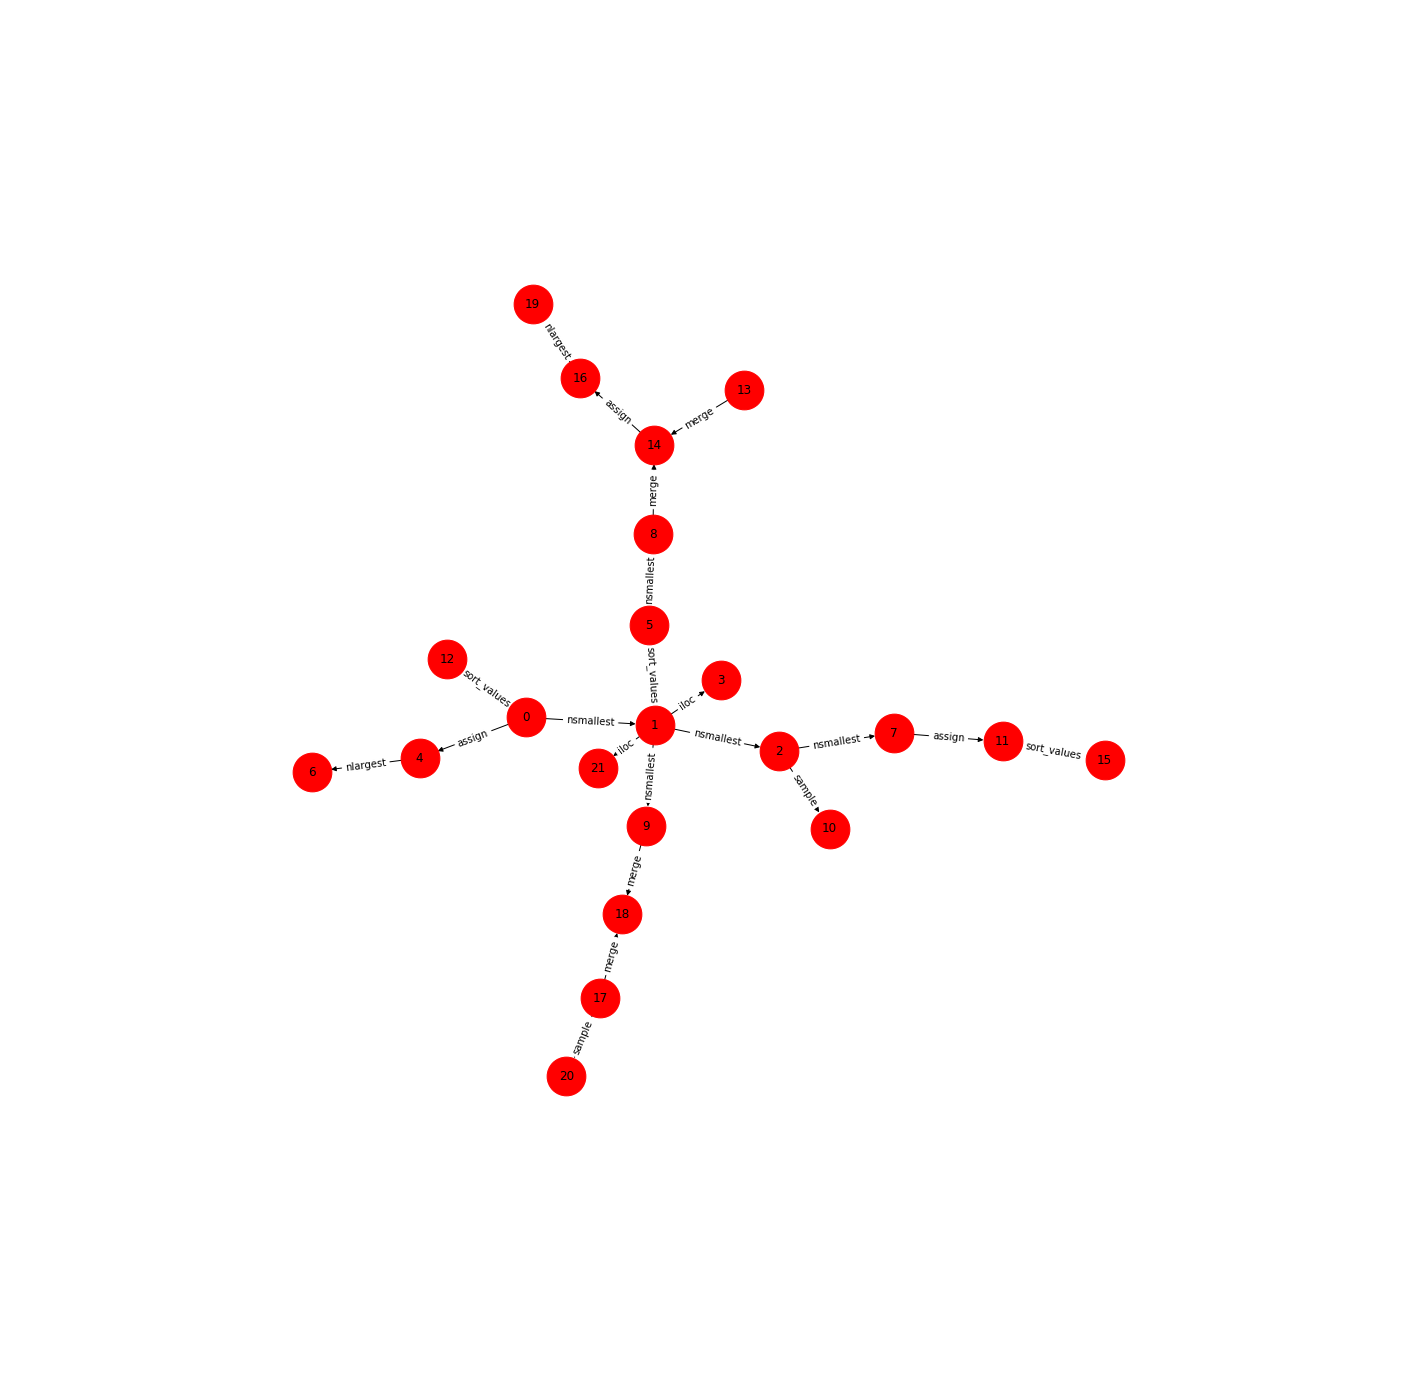

In [186]:
ds.lineage.draw_graph(canvas_size=(25,25))

In [74]:
# Imports and Environmental Setup
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from fakergen import *

i = 0 
while i < 1:
    ds,errors = generate_dataset((1000,10), 20, 'test/', npp=True)
    c = len([x for x in nx.weakly_connected_components(ds.lineage.graph)])
    if c > 2:
        break
    i += 1

Selection Config:  [4 2 3 1]
Base DF:  ['iban', 'email', 'ascii_safe_email', 'uuid4', 'company', 'pybool', 'randomize_nb_elements', 'random_int', 'numerify', 'address']
Version: 1 applying: pivot
Chain check for pivot and groupby
Pivoting using index: pybool  column: company and values: numerify



Version: 2 applying: point_edit
Selected Column Chapman, Keller and Butler
Empty DF result
Version: 2 applying: point_edit
Selected Column uuid4
Split uuid4
Replacing uuid4 value edb77a3d-74e3-441f-8099-02f107c4fd28 with c65dfc7c-6670-4e87-b225-dd0423045295



Version: 3 applying: sample



Version: 4 applying: assign
Applying function exp to column random_int


/home/suhail/anaconda3/envs/relic/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Applying function exp to column random_int
Assigned Column already exists / Original column does not exist
Applying function exp to column random_int

Version: 5 applying: pivot
Chain check for pivot and groupby
Pivoting using index: company  column: pybool and values: randomize_nb_elements



Version: 6 applying: assign
Cannot select 1 number of columns of type numeric
Cannot apply operation because of missing column type, skipping
Version: 6 applying: pivot
Chain check for pivot and groupby
Pivoting using index: company  column: pybool and values: randomize_nb_elements



Version: 7 applying: groupby
Chain check for pivot and groupby
Grouping By:  company aggregation:  mean


Grouping By:  company aggregation:  mean
Grouping By:  company aggregation:  mean
Grouping By:  company aggregation:  mean

Missing cols as a result of this new operation groupby {'ascii_safe_email', 'email', 'address', 'uuid4', 'iban'}
                         company  pybool  randomize_nb_elements  random_int  \
476      Saunders, Le and Sexton   False                   12.0      1413.0   
225              Russell-Francis   False                   10.0      1899.0   
36                Castillo Group   False                    6.0      7567.0   
498            Reynolds and Sons   False                   11.0      4816.0   
644                   Brewer Inc    True                   11.0      5536.0   
..                           ...     ...                    ...         ...   
966                 Wilson-Smith   False                   10.0      5948.0   
118                   Howell Ltd    True                    7.0      8296.0   
468                     Lamb Inc    True            


Version: 10 applying: pivot
Chain check for pivot and groupby
Pivoting using index: company  column: pybool and values: numerify



Version: 11 applying: merge
Cannot select 1 number of columns of type joinable
Cannot apply operation because of missing column type, skipping
Version: 11 applying: groupby
Chain check for pivot and groupby
Grouping By:  company aggregation:  mean


Grouping By:  company aggregation:  mean
Grouping By:  company aggregation:  mean
Grouping By:  company aggregation:  mean
Grouping By:  company aggregation:  mean
Grouping By:  company aggregation:  mean
Grouping By:  company aggregation:  mean

Version: 12 applying: groupby
Chain check for pivot and groupby
Grouping By:  pybool aggregation:  sum


Grouping By:  pybool aggregation:  sum
Grouping By:  pybool aggregation:  sum
Grouping By:  pybool aggregation:  sum
Grouping By:  pybool aggregation:  sum
Grouping By:  pybool aggregation:  sum
Grouping By:  pybool aggregation:  sum
Grouping By:  pybool aggregation:  sum

Missing cols as a result of this new operation groupby {'ascii_safe_email', 'email', 'address', 'uuid4', 'company', 'iban'}
     pybool  randomize_nb_elements  random_int  numerify
0      True                   13.0      2693.0     481.0
1     False                    6.0      8926.0     113.0
2      True                   10.0      5665.0      25.0
3     False                   10.0      8662.0     293.0
4     False                   10.0      5762.0     882.0
..      ...                    ...         ...       ...
995    True                   13.0      2544.0      72.0
996   False                   11.0      3512.0     999.0
997    True                   13.0      5912.0     512.0
998   False                   13

Replacing numerify value 148.0 with 264.0
Replacing numerify value 148.0 with 264.0
Replacing numerify value 148.0 with 264.0
Replacing numerify value 148.0 with 264.0
Replacing numerify value 148.0 with 264.0
Replacing numerify value 148.0 with 264.0
Replacing numerify value 148.0 with 264.0
Replacing numerify value 148.0 with 264.0

Version: 15 applying: pivot
Chain check for pivot and groupby
Chain threshold exceeded 1

Cannot apply operation because generated dataframe is too similar to ones already generated, skipping
Version: 15 applying: dropcol
Dropping column random_int__exp7



Version: 16 applying: pivot
Chain check for pivot and groupby
Pivoting using index: company  column: pybool and values: numerify




Cannot apply operation because generated dataframe is too similar to ones already generated, skipping
Version: 16 applying: pivot
Chain check for pivot and groupby
Pivoting using index: pybool  column: company and values: random_int



Version: 17 applying: groupby
Chain check for pivot and groupby
Grouping By:  pybool aggregation:  mean


Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean
Grouping By:  pybool aggregation:  mean

Version: 18 applying: sample



Version: 19 applying: pivot
Chain check for pivot and groupby
Cannot select 2 number of columns of type groupable
Cannot apply operation because of missing column type, skipping
Version: 19 applying: pivot
Chain check for pivot and groupby
Pivoting using index: company  column: pybool and values: random_int



Version: 20 applying: assign
Applying function cumsum to column randomize_nb_elements


Applying function cumsum to column randomize_nb_elements
Assigned Column already exists / Original column does not exist
Applying function cumsum to column randomize_nb_elements
Applying function cumsum to column randomize_nb_elements
Applying function cumsum to column randomize_nb_elements
Assigned Column already exists / Original column does not exist
Assigned Column already exists / Original column does not exist
Applying function cumsum to column randomize_nb_elements
Applying function cumsum to column randomize_nb_elements
Applying function cumsum to column randomize_nb_elements
Assigned Column already exists / Original column does not exist
Applying function cumsum to column randomize_nb_elements
Applying function cumsum to column randomize_nb_elements
Applying function cumsum to column randomize_nb_elements
Applying function cumsum to column randomize_nb_elements
Assigned Column already exists / Original column does not exist
Applying function cumsum to column randomize_nb_eleme

Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count
Grouping By:  pybool aggregation:  count

{(3, '5'): [4], (2, '6'): [0], (4, '10'): [3, 7], ('12', '13'): [0], (2, '16'): [0], (12, '17'): [0, 2], (7, '19'): [3, 4, 15]}


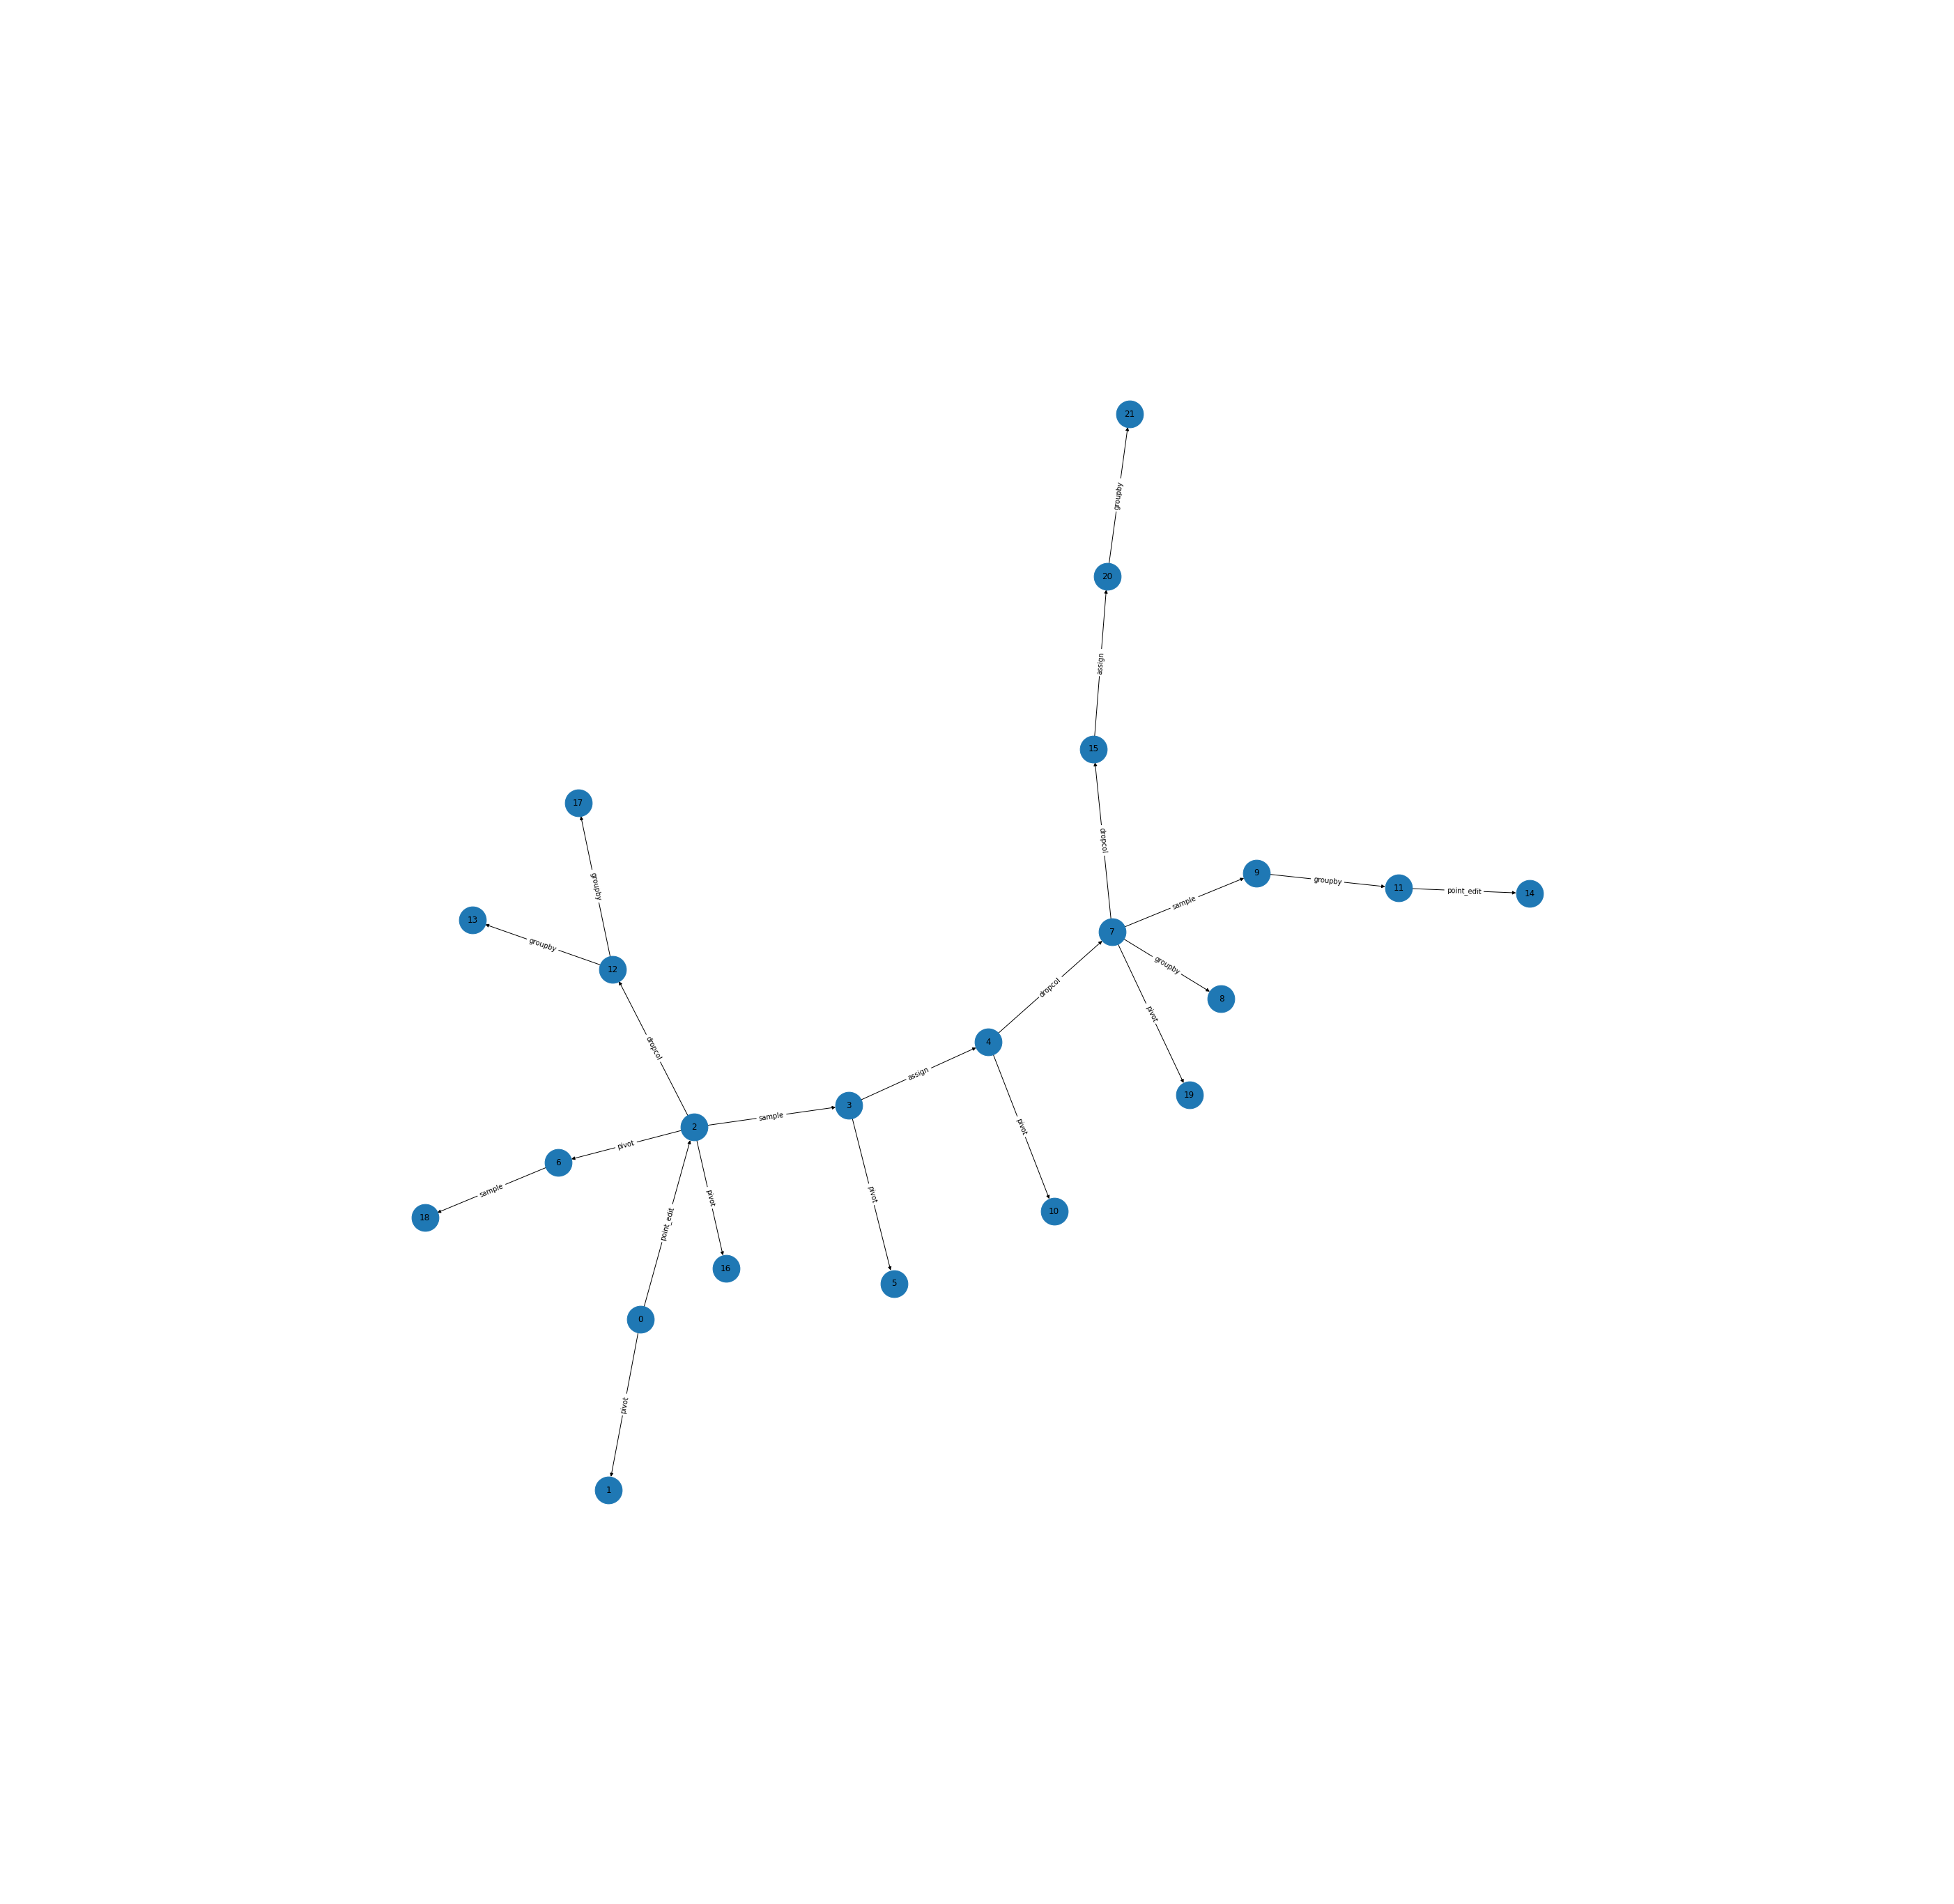

In [77]:
ds.lineage.draw_graph(canvas_size=(50,50))

In [87]:
ds[9]

,company,pybool,randomize_nb_elements,random_int,numerify,random_int__exp7
184,House LLC,True,6.0,4984.0,562.0,inf
507,Kelley-Wright,False,7.0,5558.0,698.0,inf
534,Nguyen-Kim,False,6.0,9444.0,277.0,inf
920,Hurst LLC,False,8.0,4670.0,89.0,inf
71,"Noble, Mendez and Davis",True,7.0,6048.0,447.0,inf
...,...,...,...,...,...,...
424,Young-Savage,True,12.0,5603.0,800.0,inf
862,"Obrien, Hill and Bray",True,7.0,9574.0,903.0,inf
518,Collins LLC,True,8.0,5241.0,988.0,inf
33,"Bradley, Jefferson and Bates",False,7.0,9070.0,640.0,inf


In [37]:
graph = ds.lineage.graph




#[x for x in nx.shortest_path(graph, v1,v2, method='dijkstra')]
def find_op_num_in_chain(graph, source, op_name):
    rev_graph = graph.reverse()
    edges = [x for x in nx.dfs_edges(rev_graph, source=source)]
    ops_in_chain = [rev_graph[u][v]['operation'] for u,v in edges]
    return len([x for x in filter(lambda x: x == op_name, ops_in_chain)])


for v in graph.nodes():
    print(find_op_num_in_chain(graph, v, 'pivot'))

0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0


In [ ]:
find_op_num_in_chain()

In [44]:
len([x for x in nx.weakly_connected_components(graph)])

1

In [71]:
ds[2]

,cryptocurrency_code,boolean,random_number
0,ADA,0.454545,6.609483e+06
1,AMP,0.464286,1.775055e+07
2,AUR,0.350000,3.969762e+07
3,BC,0.583333,7.841854e+07
4,BCH,0.263158,8.338500e+07
5,BCN,0.433333,6.803170e+07
6,BTC,0.444444,6.385663e+07
7,BURST,0.280000,2.182312e+07
8,DASH,0.500000,1.028228e+07
9,DOGE,0.523810,9.784498e+07


In [ ]:
def num_operations(graph,v1,v2,op):
    path_iterable = nx.shortest_simple_paths(graph, v1,v2)
    op_filter = lambda x: x[]

In [70]:
dataset[]

IndexError: list index out of range

In [52]:
dataset.apply_op(dataset.pivot)

Pivoting using index: file_extension  column: prefix_female and values: pyfloat


In [53]:
dataset[1]

prefix_female,Dr.,Miss,Mrs.,Ms.
file_extension,,,,
avi,8.298400e+03,-7.828974e+01,8.914077e+14,3.147394e+13
bmp,NaN,-2.354129e+12,-5.659974e+08,NaN
css,-7.069773e+07,NaN,3.718593e+11,NaN
csv,-1.203844e+04,NaN,NaN,4.300921e+04
doc,NaN,NaN,8.055619e+10,NaN
docx,8.458685e+09,NaN,NaN,NaN
flac,NaN,NaN,8.659688e+13,1.775299e+09
gif,NaN,8.084710e+12,1.698395e+03,NaN
html,NaN,NaN,3.942218e+07,2.000000e+00


In [46]:
i='military_state'
c='prefix_female'
v='pyint'
dataset[0].pivot(index=i, columns=c, values=v)

ValueError: Index contains duplicate entries, cannot reshape

In [28]:
dataset.select_rand_col_group(dataset[0], 'groupable', 2)

['city_prefix', 'city_prefix']

In [42]:
dataset[0].pivot(index='credit_card_expire', columns='currency_name', values='pyfloat')

currency_name,Afghan afghani,Algerian dinar,Argentine peso,Australian dollar,Bahraini dinar,Barbadian dollar,Belarusian ruble,Bhutanese ngultrum,Bosnia and Herzegovina convertible mark,Brunei dollar,...,Tanzanian shilling,Thai baht,Turkmenistan manat,Ugandan shilling,United States dollar,Venezuelan bolívar,Vietnamese đồng,West African CFA franc,Western Krahn language,Zambian kwacha
credit_card_expire,,,,,,,,,,,,,,,,,,,,,
01/21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/25,NaN,NaN,NaN,NaN,-2.877685e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-65100.50271,NaN,NaN,NaN,NaN
01/30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.188084e+14,NaN,NaN,NaN,NaN,NaN,NaN
02/22,NaN,NaN,NaN,NaN,NaN,1.150973e+12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02/23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
dataset = FakerVersionGenerator(shape=(100,10), scale=10, out_directory='test1/', gt_prefix='dataset', npp=True, matfreq=1)


Selection Config:  [4 0 3 3]
Base DF:  ['bothify', 'isbn10', 'ascii_safe_email', 'ssn', 'pyint', 'numerify', 'random_number', 'word', 'secondary_address', 'domain_name']


In [52]:
num_rows = 1000

data = []

for coltype, colnames in dataset.functions.items():
    for col in colnames:
        if coltype == 'numeric':
            gen_col = pd.Series((dataset.fake.format(col) for _ in range(num_rows)), dtype='float64')
        else:
            gen_col = pd.Series((dataset.fake.format(col) for _ in range(num_rows)))
            
        cardinality = len(set(gen_col.values))
        data.append({'coltype': coltype, 
                     'colname': col, 
                     'selectivity': cardinality / num_rows,
                     'cardinality': cardinality,
                     'num_rows': num_rows,
                     'sample': dataset.fake.format(col)})
        
df = pd.DataFrame(data)
df

,coltype,colname,selectivity,cardinality,num_rows,sample
0,joinable,ascii_company_email,1.000,1000,1000,maryallen@munoz-doyle.com
1,joinable,ascii_email,0.999,999,1000,zowens@hotmail.com
2,joinable,ascii_free_email,1.000,1000,1000,jbrennan@gmail.com
3,joinable,ascii_safe_email,0.999,999,1000,johnatkinson@example.net
4,joinable,bban,1.000,1000,1000,WHEE25948230965279
...,...,...,...,...,...,...
148,string,uri_path,0.446,446,1000,blog
149,string,url,0.931,931,1000,http://www.long-hurley.com/
150,string,user_agent,0.957,957,1000,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_8...
151,string,windows_platform_token,0.012,12,1000,Windows 98; Win 9x 4.90


In [54]:
sorted_df = df.sort_values('selectivity')

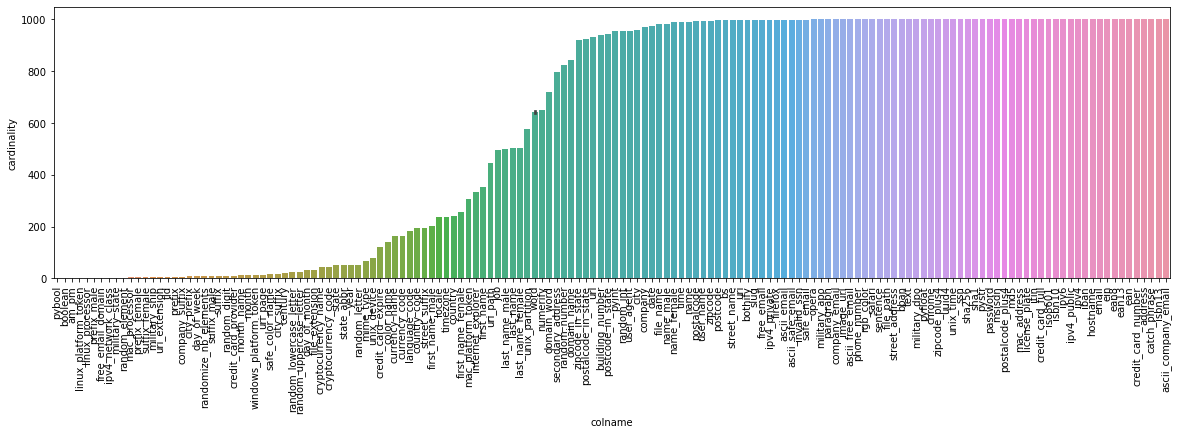

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5 ))
chart = sns.barplot(x='colname', y='cardinality',data=sorted_df)
labels = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [66]:
set(dataset.dataset[0]) - set(dataset.dataset[0])

set()

In [46]:
# Compute column cardinality probability matrix here
from fakergen import *
from collections import defaultdict
import numpy as np

row_sizes = [10, 100, 1000,10000,100000,1000000]
card_ratios = list(np.arange(0,1.0,0.1))
dataset = FakerVersionGenerator(shape=(100,10), scale=10, out_directory='test1/', gt_prefix='dataset', npp=True, matfreq=1)

r_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for num_rows in row_sizes:
    
    for coltype, colnames in dataset.functions.items():
        for col in colnames:
            if coltype == 'numeric':
                gen_col = pd.Series((dataset.fake.format(col) for _ in range(num_rows)), dtype='float64')
            else:
                gen_col = pd.Series((dataset.fake.format(col) for _ in range(num_rows)))

            cardinality = len(set(gen_col.values))
            c_ratio = float(cardinality / num_rows)
            c_index = int(np.digitize(c_ratio, card_ratios)-1)
            print(num_rows, col, coltype, c_ratio, c_index)
            r_dict[num_rows][c_index][coltype].append(col)

            
            
            
            
'''
data.append({'coltype': coltype, 
             'colname': col,  
             'selectivity': cardinality / num_rows,
             'cardinality': cardinality,
             'num_rows': num_rows,
             'sample': dataset.fake.format(col)})
'''

Selection Config:  [3 4 2 1]
Base DF:  ['itin', 'bban', 'ean13', 'currency_code', 'last_name_male', 'linux_platform_token', 'prefix_male', 'randomize_nb_elements', 'random_int', 'chrome']
10 ascii_company_email joinable 1.0 9
10 ascii_email joinable 1.0 9
10 ascii_free_email joinable 1.0 9
10 ascii_safe_email joinable 1.0 9
10 bban joinable 1.0 9
10 bothify joinable 1.0 9
10 building_number joinable 1.0 9
10 company_email joinable 1.0 9
10 credit_card_number joinable 1.0 9
10 ean joinable 1.0 9
10 ean13 joinable 1.0 9
10 ean8 joinable 1.0 9
10 ein joinable 1.0 9
10 email joinable 1.0 9
10 free_email joinable 1.0 9
10 hostname joinable 1.0 9
10 iban joinable 1.0 9
10 invalid_ssn joinable 1.0 9
10 ipv4 joinable 1.0 9
10 ipv4_private joinable 1.0 9
10 ipv4_public joinable 1.0 9
10 ipv6 joinable 1.0 9
10 isbn10 joinable 1.0 9
10 isbn13 joinable 1.0 9
10 iso8601 joinable 1.0 9
10 itin joinable 1.0 9
10 license_plate joinable 1.0 9
10 mac_address joinable 1.0 9
10 md5 joinable 1.0 9
10 msisd

100 street_address string 1.0 9
100 street_name string 1.0 9
100 text string 1.0 9
100 time string 1.0 9
100 timezone string 0.83 8
100 unix_device string 0.6 5
100 unix_partition string 0.97 9
100 uri string 1.0 9
100 uri_path string 0.77 7
100 url string 1.0 9
100 user_agent string 0.99 9
100 windows_platform_token string 0.12 1
100 word string 1.0 9
1000 ascii_company_email joinable 1.0 9
1000 ascii_email joinable 0.999 9
1000 ascii_free_email joinable 0.996 9
1000 ascii_safe_email joinable 0.997 9
1000 bban joinable 1.0 9
1000 bothify joinable 0.997 9
1000 building_number joinable 0.937 9
1000 company_email joinable 1.0 9
1000 credit_card_number joinable 1.0 9
1000 ean joinable 1.0 9
1000 ean13 joinable 1.0 9
1000 ean8 joinable 1.0 9
1000 ein joinable 1.0 9
1000 email joinable 0.999 9
1000 free_email joinable 0.996 9
1000 hostname joinable 1.0 9
1000 iban joinable 1.0 9
1000 invalid_ssn joinable 1.0 9
1000 ipv4 joinable 1.0 9
1000 ipv4_private joinable 1.0 9
1000 ipv4_public joinab

10000 postcode_in_state groupable 0.826 8
10000 prefix groupable 0.0005 0
10000 prefix_female groupable 0.0004 0
10000 prefix_male groupable 0.0002 0
10000 pybool groupable 0.0002 0
10000 random_element groupable 0.0003 0
10000 random_letter groupable 0.0052 0
10000 random_lowercase_letter groupable 0.0026 0
10000 random_uppercase_letter groupable 0.0026 0
10000 safe_color_name groupable 0.0015 0
10000 state groupable 0.005 0
10000 state_abbr groupable 0.0051 0
10000 street_suffix groupable 0.0195 0
10000 suffix groupable 0.0009 0
10000 suffix_female groupable 0.0004 0
10000 suffix_male groupable 0.0009 0
10000 tld groupable 0.0005 0
10000 uri_extension groupable 0.0005 0
10000 uri_page groupable 0.0014 0
10000 year groupable 0.0051 0
10000 numerify numeric 0.1 1
10000 pyfloat numeric 0.9939 9
10000 pyint numeric 0.6312 6
10000 random_digit numeric 0.001 0
10000 random_int numeric 0.6334 6
10000 random_number numeric 0.7231 7
10000 randomize_nb_elements numeric 0.0009 0
10000 address s

1000000 free_email joinable 0.521526 5
1000000 hostname joinable 0.80919 8
1000000 iban joinable 1.0 9
1000000 invalid_ssn joinable 0.628753 6
1000000 ipv4 joinable 0.999869 9
1000000 ipv4_private joinable 0.68066 6
1000000 ipv4_public joinable 0.99983 9
1000000 ipv6 joinable 1.0 9
1000000 isbn10 joinable 0.997566 9
1000000 isbn13 joinable 0.997559 9
1000000 iso8601 joinable 0.999693 9
1000000 itin joinable 0.98233 9
1000000 license_plate joinable 0.992196 9
1000000 mac_address joinable 1.0 9
1000000 md5 joinable 1.0 9
1000000 msisdn joinable 1.0 9
1000000 password joinable 1.0 9
1000000 pystr joinable 1.0 9
1000000 safe_email joinable 0.521089 5
1000000 sha1 joinable 1.0 9
1000000 sha256 joinable 1.0 9
1000000 ssn joinable 0.999454 9
1000000 unix_time joinable 0.999683 9
1000000 user_name joinable 0.34364 3
1000000 uuid4 joinable 1.0 9
1000000 word joinable 0.000971 0
1000000 zipcode joinable 0.099442 0
1000000 zipcode_in_state joinable 0.077946 0
1000000 zipcode_plus4 joinable 0.9995

"\ndata.append({'coltype': coltype, \n             'colname': col,  \n             'selectivity': cardinality / num_rows,\n             'cardinality': cardinality,\n             'num_rows': num_rows,\n             'sample': dataset.fake.format(col)})\n"

In [25]:
# Pickle Format (Lambda screws this up)
import pickle

config_dict={
    'row_sizes': row_sizes,
    'card_ratios': card_ratios,
    'prob_dict': r_dict
}

pickle.dump(config_dict, open( "config_dict.pkl", "wb" ))

PicklingError: Can't pickle <function <lambda> at 0x7f668e128c10>: attribute lookup <lambda> on __main__ failed

In [47]:
#JSON 

import json


config_dict={
    'row_sizes': row_sizes,
    'card_ratios': card_ratios,
    'prob_dict': r_dict
}


class NpEncoders(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, dict):
            return {self.default(k): self.default(v) for k, v in obj.items()}
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            try:
                return json.JSONEncoder.default(self, obj)
            except TypeError as e:
                print(obj)



In [48]:
with open('config_dict.json', 'w') as fp:
    json.dump(config_dict, fp, default=int)

In [49]:
config_dict

{'row_sizes': [10, 100, 1000, 10000, 100000, 1000000],
 'card_ratios': [0.0,
  0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6000000000000001,
  0.7000000000000001,
  0.8,
  0.9],
 'prob_dict': defaultdict(<function __main__.<lambda>()>,
             {10: defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                          {9: defaultdict(list,
                                       {'joinable': ['ascii_company_email',
                                         'ascii_email',
                                         'ascii_free_email',
                                         'ascii_safe_email',
                                         'bban',
                                         'bothify',
                                         'building_number',
                                         'company_email',
                                         'credit_card_number',
                                         'ean',
                                         'e

In [ ]:
def select_new_column(config_dict, contraints=None):
    